In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vle-dataset/VLE_12k_dataset_v1.csv


In [2]:
#Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# 1. Data Exploration and Understanding

In [3]:
df = pd.read_csv('/kaggle/input/vle-dataset/VLE_12k_dataset_v1.csv')
df.head()

,id,fold,categories,word_count,title_word_count,document_entropy,easiness,fraction_stopword_presence,fraction_stopword_coverage,preposition_rate,...,silent_period_rate,min_engagement,max_engagement,med_engagement,mean_engagement,sd_engagement,num_learners,num_views,avg_star_rating,num_star_ratings
0,1,1,stem,2668,9,7.753995,75.583936,0.553664,0.428135,0.121392,...,0.0,0.030241,1.0,0.502923,1.000000,1.574152,53,1899,-1.0,0
1,2,1,misc,7512,6,8.305269,86.870523,0.584498,0.602446,0.095885,...,0.0,0.008136,1.0,0.011989,0.165811,0.368124,7,1982,-1.0,0
2,3,1,stem,4264,3,7.965583,81.915968,0.605685,0.525994,0.118294,...,0.0,0.009563,1.0,0.041627,0.199148,0.358510,39,3561,5.0,1
3,4,1,stem,2869,9,8.142877,80.148937,0.593664,0.504587,0.122590,...,0.0,0.016787,1.0,0.064989,0.317020,0.662013,36,3030,-1.0,0
4,5,1,misc,4840,9,8.161250,76.907549,0.581637,0.559633,0.130700,...,0.0,0.014288,1.0,0.052154,0.147820,0.263750,25,2864,-1.0,0


In [4]:
df.columns

Index(['id', 'fold', 'categories', 'word_count', 'title_word_count',
       'document_entropy', 'easiness', 'fraction_stopword_presence',
       'fraction_stopword_coverage', 'preposition_rate', 'auxiliary_rate',
       'tobe_verb_rate', 'conjugate_rate', 'normalization_rate',
       'pronoun_rate', 'freshness', 'auth_topic_rank_1_url',
       'auth_topic_rank_1_score', 'auth_topic_rank_2_url',
       'auth_topic_rank_2_score', 'auth_topic_rank_3_url',
       'auth_topic_rank_3_score', 'auth_topic_rank_4_url',
       'auth_topic_rank_4_score', 'auth_topic_rank_5_url',
       'auth_topic_rank_5_score', 'coverage_topic_rank_1_url',
       'coverage_topic_rank_1_score', 'coverage_topic_rank_2_url',
       'coverage_topic_rank_2_score', 'coverage_topic_rank_3_url',
       'coverage_topic_rank_3_score', 'coverage_topic_rank_4_url',
       'coverage_topic_rank_4_score', 'coverage_topic_rank_5_url',
       'coverage_topic_rank_5_score', 'duration', 'speaker_speed', 'has_parts',
       'type',

There 4 main types of features extracted from the video lectures. These features can be categorised into six quality verticals.

All the features that are included in the dataset are summarised in Table 1.

Table 1: Features extracted and available in the VLE dataset with their variable type (Continuous vs. Categorical) and their quality vertical.


#### Metadata-based   Features
| Variable Type        | Name                | Quality Vertical  | Description |
|----------------------|---------------------|-------------------|--------------------------------------------------------------|
| cat                  | Language            | -                 | Language of instruction of the video lecture |
|cat                   | Domain              | -                 | (STEM or Miscellaneous) |



#### Content-based   Features

| Variable Type        | Name                | Quality Vertical  | Description |
|----------------------|---------------------|-------------------|--------------------------------------------------------------|
|con                   |Word Count           |Topic Coverage     |Word Count of Transcript|
|con|**Title Word Count**|Topic Coverag|Word Count of Title|
|con|**Document Entropy**|Topic Coverage|Document Entropy of Transcript
|con|**Easiness (FK Easiness)**|Understandability|FK Easiness based on FK Easiness
|con|**Stop-word Presence Rate**|Understandability|Stopword Presence Rate of Transcript text
|con|Stop-word Coverage Rate|Understandability|Stopword Coverage Rate of Transcript text
|con|Preposition Rate|Presentation|Preposition Rate of Transcript text
|con|Auxiliary Rate|Presentation|Auxiliary Rate of Transcript text
|con|To Be Rate|Presentation|To-Be Verb Rate of Transcript text
|con|Conjunction Rate|Presentation|Conjunction Rate of Transcript text
|con|Normalisation Rate|Presentation|Normalisation Rate of Transcript text
|con|Pronoun Rate|Presentation|Pronoun Rate of Transcript text
|con|**Published Date**|Freshness|Duration between 01/01/1970 and the lecture published date (in days)

#### Wikipedia-based   Features

| Variable Type        | Name                | Quality Vertical  | Description |
|----------------------|---------------------|-------------------|--------------------------------------------------------------|
|cat.|Top-5 Authoritative Topic URLs|Authority|5 Most Authoritative Topic URLs based on PageRank Score. 5 features in   this group
|con.|Top-5 PageRank Scores|Authority|PageRank Scores of the top-5 most authoritative topics
|cat.|Top-5 Covered Topic URLs|Topic Coverage|5 Most Covered Topic URLs based on Cosine Similarity Score. 5 features in   this group
|con.|Top-5 Cosine Similarities|Topic Coverage|Cosine Similarity Scores of the top-5 most covered topics

#### Video-based Features

| Variable Type        | Name                | Quality Vertical  | Description |
|----------------------|---------------------|-------------------|--------------------------------------------------------------|
|con.|Lecture Duration|Topic Coverage|Duration of the video (in seconds)
|cat.|Is Chunked|Presentation|If the lecture consists of multiple videos
|cat.|Lecture Type|Presentation|Type of lecture (lecture, tutorial, invited talk etc.)
|con.|**Speaker speed**|Presentation|Speaker speed (words per minute)
|con.|**Silence Period Rate (SPR)**|Presentation|Fraction of silence in the lecture video

For know how the dataset owner extract the features you can consult the original dataset in Github https://github.com/sahanbull/VLE-Dataset

The first time that I approach to this dataset was in the final assigment in the Data Science with Python course from Michigan University. It was a Logistic Problem where the Target Variable was predict it a Video will have a engagement over 30% ("mean_engagement" > 0.3 = TRUE) In this ocassion, the target is a continue variables. Let's see the distribution of this variable.

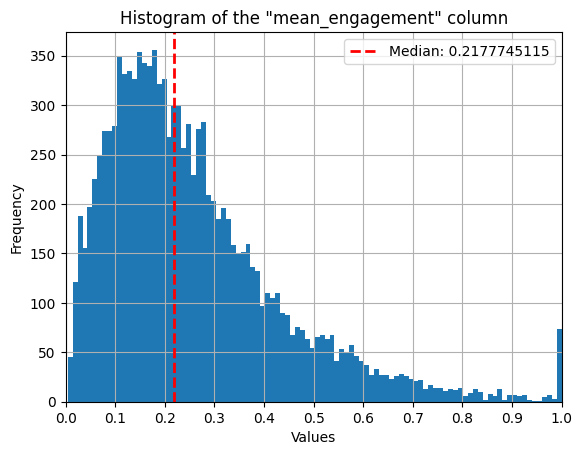

In [5]:
df['mean_engagement'].hist(bins=100)  # You can adjust the number of bins as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of the "mean_engagement" column')

# Adjust the horizontal axis for more values
plt.xlim(0, 1)
plt.xticks([i/10 for i in range(11)])  

median_value = df['mean_engagement'].median()
plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_value}')
plt.legend()

plt.show()

The target column has a left skewness. In the prediction task, the model will have a prediction bias due to this asymmetry.

# 2. Data Preprocessing

We start by picking the appropiate features for our model. I will based in the features choosen in final assigmnet in coursera course. *(Those that are highlighted in the tables above)*

In [6]:
df = df[['title_word_count','document_entropy','easiness','fraction_stopword_presence',
         'freshness','speaker_speed','silent_period_rate','mean_engagement']]

df.head()

,title_word_count,document_entropy,easiness,fraction_stopword_presence,freshness,speaker_speed,silent_period_rate,mean_engagement
0,9,7.753995,75.583936,0.553664,16310,2.997753,0.0,1.000000
1,6,8.305269,86.870523,0.584498,15410,2.635789,0.0,0.165811
2,3,7.965583,81.915968,0.605685,15680,2.538095,0.0,0.199148
3,9,8.142877,80.148937,0.593664,15610,2.259055,0.0,0.317020
4,9,8.161250,76.907549,0.581637,14920,2.420000,0.0,0.147820


In [7]:
#Looking for missing Values

df.isnull().sum()

title_word_count              0
document_entropy              0
easiness                      0
fraction_stopword_presence    0
freshness                     0
speaker_speed                 0
silent_period_rate            0
mean_engagement               0
dtype: int64

finally, we will apply a Max Min Scaler for normalize the numerical values can improve the stability and performance of the model.

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_scaled.head()



,title_word_count,document_entropy,easiness,fraction_stopword_presence,freshness,speaker_speed,silent_period_rate,mean_engagement
0,0.25000,0.835688,0.504929,0.553664,0.830303,0.003402,0.0,1.000000
1,0.15625,0.895102,0.625228,0.584498,0.693939,0.002991,0.0,0.162293
2,0.06250,0.858492,0.572420,0.605685,0.734848,0.002881,0.0,0.195771
3,0.25000,0.877600,0.553586,0.593664,0.724242,0.002564,0.0,0.314140
4,0.25000,0.879580,0.519037,0.581637,0.619697,0.002747,0.0,0.144227


# 3. Model Selection

Let's compare 2 differents models. **1. Linear Regression**: target variable is continuous and I want to predict values between 0 and 1, this model is the simpliest way.  **2. GradientBoostingRegressor**: Gradient Boosting algorithms, by building successive trees to correct the errors of the previous model, can be robust to asymmetry in the data.

In [9]:
from sklearn.model_selection import train_test_split

#Split the training dataset

X = df_scaled[['title_word_count','document_entropy','easiness','fraction_stopword_presence','freshness','speaker_speed','silent_period_rate']]
y = df_scaled[['mean_engagement']]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


## 3.1 Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = linear_model.predict(X_train)

# Evaluate on the training set
train_mse = mean_squared_error(y_train, y_train_pred)
print("Training MSE:", train_mse)

# Predictions on the validation set
y_val_pred = linear_model.predict(X_val)

# Evaluate on the validation set
val_mse = mean_squared_error(y_val, y_val_pred)
print("Validation MSE:", val_mse)

Training MSE: 0.025303701125572026
Validation MSE: 0.0255214998471725


## 3.2 GradientBoostingRegressor

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Create a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = gb_model.predict(X_train)

# Evaluate on the training set
train_mse = mean_squared_error(y_train, y_train_pred)
print("Training MSE:", train_mse)

# Predictions on the validation set
y_val_pred = gb_model.predict(X_val)

# Evaluate on the validation set
val_mse = mean_squared_error(y_val, y_val_pred)
print("Validation MSE:", val_mse)


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training MSE: 0.01726468253329419
Validation MSE: 0.01924155726521775


Comparing the Hyperparameters Tunning before and after we have not much difference and in both cases we have a good performance. Comparing this model of the Gradient Boost againgst the simple Linear Regression we have good performance in both cases but a **better** one with the **Gradient Boost** with errors measures under 2%

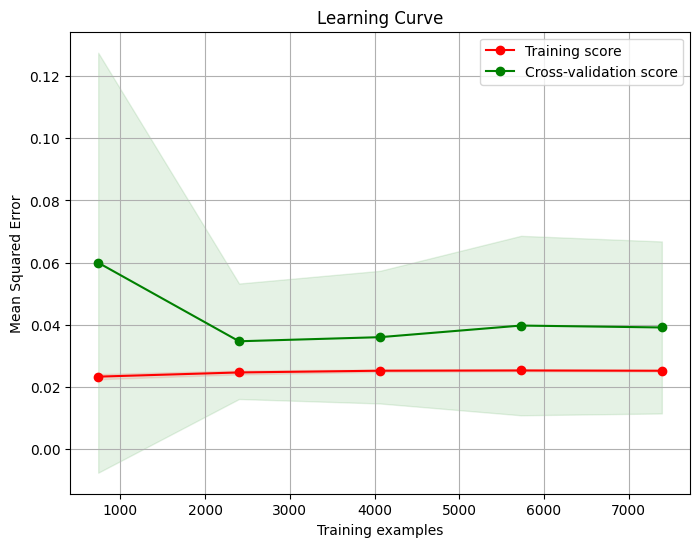

In [12]:
from sklearn.model_selection import learning_curve

# Function to plot learning curve
def plot_learning_curve(estimator, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(8, 6))
    plt.title("Learning Curve")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Mean Squared Error")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error')
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
plot_learning_curve(linear_model, X_train, y_train, cv=5, n_jobs=-1)
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

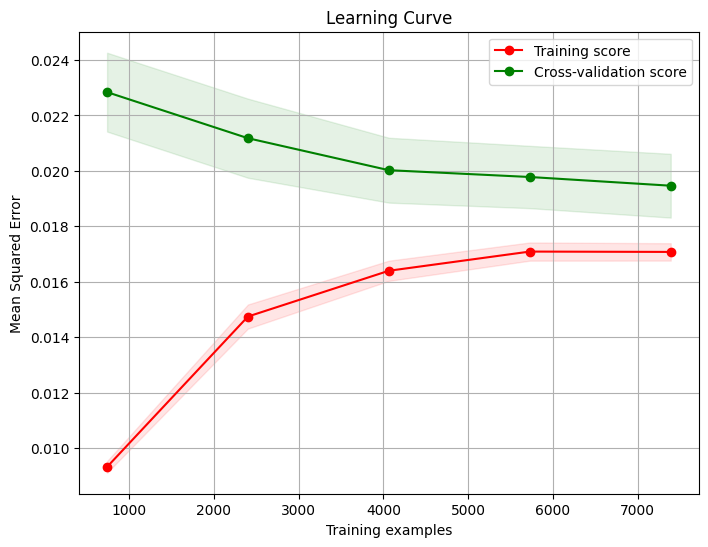

In [13]:
plot_learning_curve(gb_model, X_train, y_train, cv=5, n_jobs=-1)
plt.show()

Final note: If you are watching this notebook and you notice something wrong, any advice or mistake, feel free to comment it. I still learning and improve my skills. Good bye